**<font size="5">Data Visualization</font>**

In [1]:
import numpy as np 
# for scientific computation of multidimensional arrays
import pandas as pd 
# data structures dealing is done 
import matplotlib.pyplot as plt 
# For plotting graphs
import seaborn as sns
# Statistical Data Visualization
%matplotlib inline
# sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,


**<font size="5">Reading DataFrames</font>**

In [2]:
'''score_df'''
d_df = pd.read_csv("../input/deliveries.csv")
# OR - pd.read_csv(data_path+"deliveries.csv"), where data_path = "../input/"
# reading deliveries dataset  
'''match_df'''
m_df = pd.read_csv("../input/matches.csv")
# OR - pd.read_csv(data_path+"matches.csv"), where data_path = "../input/"
# reading matches dataset
# csv- Comma seperated values

In [3]:
d_df.head(5)
# Printing the first five rows of the dataset to just look how the dataset is !

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
m_df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
print("Number of matches played: ",m_df.shape[0])
# https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.shape.html
print("Number of seasons: ",len(m_df.season.unique()))
# unique season values from dataset is printed.

Number of matches played:  636
Number of seasons:  10


**<font size="3">Matches per Season</font>**

[]

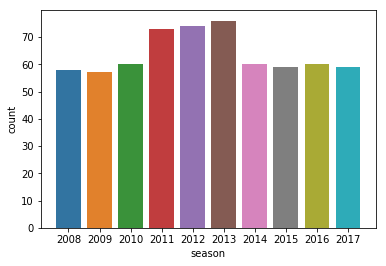

In [6]:
sns.countplot(x='season',data=m_df)
# counts the number of each season's value, i.e, counting the number of matches played per season
plt.plot()
# Plotting graph

**<font size="3">Venue-wise Matches</font>**

[]

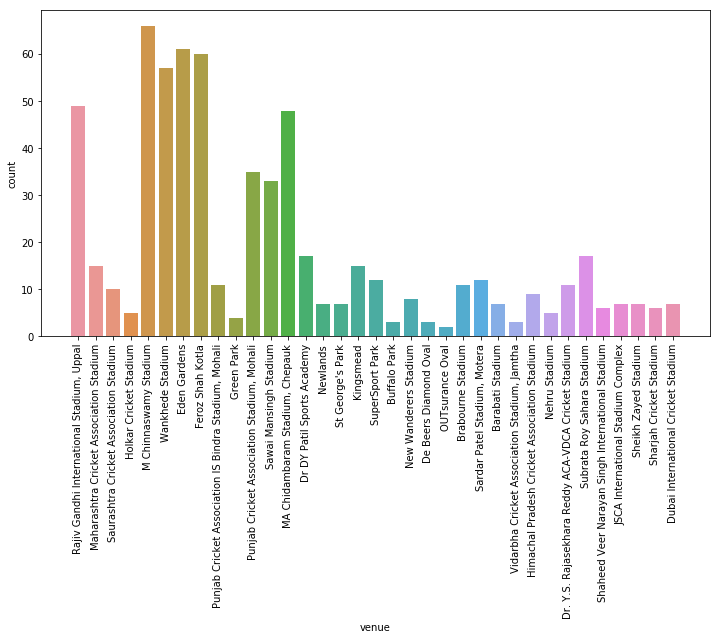

In [7]:
plt.figure(figsize=(12,6))
# Sets the figure(plot) size.
sns.countplot(x='venue', data=m_df)
# same as above
plt.xticks(rotation='vertical')
# x-axis names vertically is shown
plt.plot()

**<font size="3">Number of matches played by each team</font>**

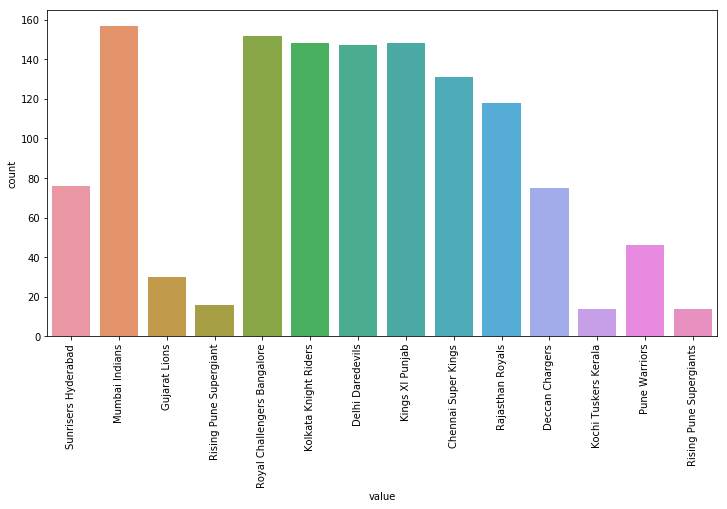

In [8]:
temp_df = pd.melt(m_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html
# https://youtu.be/qOkj5zOHwRE -> Video URL
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=temp_df)
plt.xticks(rotation='vertical')
plt.show()


**<font size="3">Number of wins/team</font>**

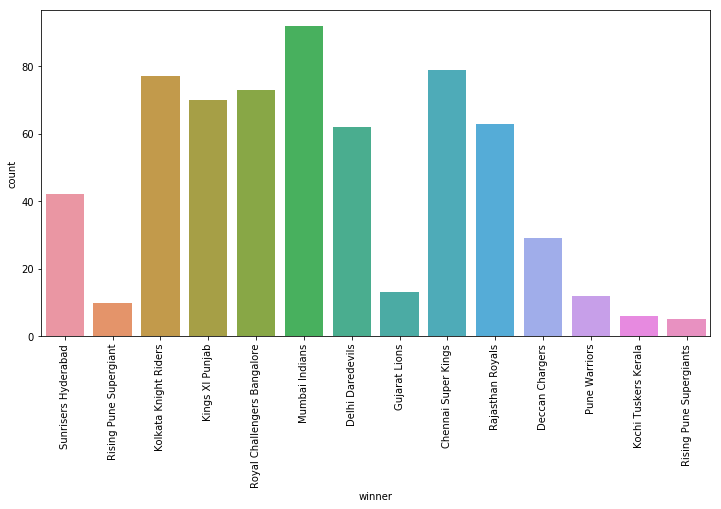

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='winner',data=m_df)
plt.xticks(rotation='vertical')
plt.show()

**<font size="3">Champions each season</font>**

In [10]:
temp_df = m_df.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
# https://stackoverflow.com/questions/44620465/python-reset-indexdrop-true-function-erroneously-removed-column
# https://stackoverflow.com/questions/33417991/pandas-why-are-double-brackets-needed-to-select-column-after-boolean-indexing
temp_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


**<font size="3">Toss Decision</font>**

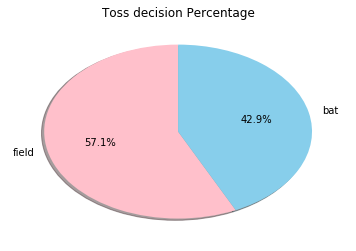

In [11]:
temp_series = m_df.toss_decision.value_counts()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
labels = (np.array(temp_series.index))
# contains "bat" and "field"
# https://docs.scipy.org/doc/numpy-1.15.0/user/basics.creation.html
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.index.html
sizes = (np.array((temp_series/temp_series.sum())*100))
# calculating %ages
colors = ['Pink','SkyBlue']
plt.pie(sizes,labels = labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
# https://www.commonlounge.com/discussion/9d6aac569e274dacbf90ed61534c076b#pie-chart
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html
plt.title("Toss decision Percentage")
plt.show()


**<font size="3">Toss decision Per Season</font>**

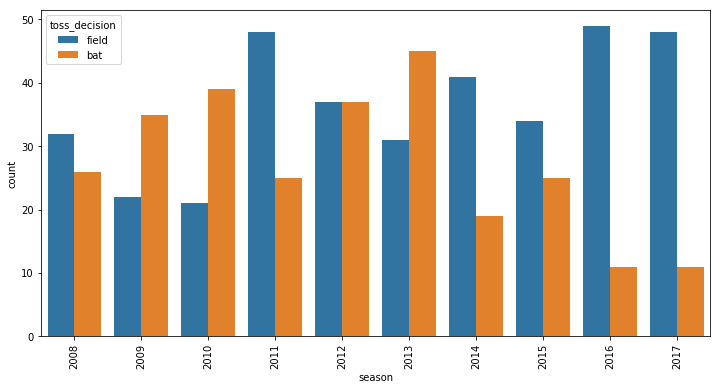

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=m_df)
# https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.xticks(rotation='vertical')
plt.show()

**<font size="3">Win %age of team BATTING second</font>**

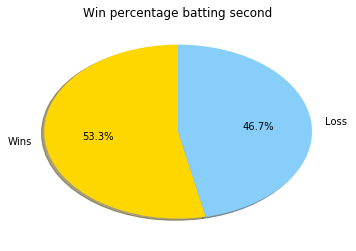

In [13]:
no_of_wins = (m_df.win_by_wickets>0).sum()
no_of_loss = (m_df.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(no_of_wins + no_of_loss)
sizes = [(no_of_wins/total)*100, (no_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()
# Similar to last pie chart


**<font size="3">Win by Year, batting second</font>**

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


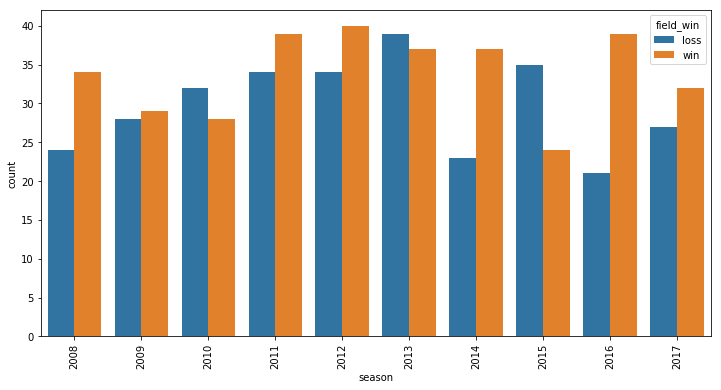

In [14]:
m_df["field_win"] = "win"
# made another column for win and loss only
m_df["field_win"].ix[m_df['win_by_wickets']==0] = "loss"
# 'ix' will select the location where 'win_by_wickets ==0' and stores "loss" in "field_win" column at that position, and rest will be stored with "win"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=m_df)
plt.xticks(rotation='vertical')
plt.show()


**<font size="3">Top players of the match</font>**

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64


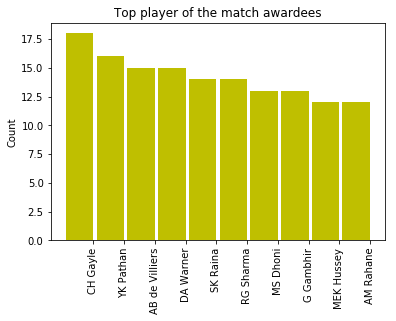

In [15]:
temp_series = m_df.player_of_match.value_counts()[:10]
print(temp_series)
# value_counts() arrange in descending order, [:10] picks the first ten(top 10).
labels = np.array(temp_series.index)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.index.html
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(temp_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
plt.show()
